In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-white-wine-dataset/wine_dataset.csv


In [113]:
d = pd.read_csv("/kaggle/input/red-white-wine-dataset/wine_dataset.csv")

# Making model for Red Wine

In [114]:
d = d[ :1499]

In [115]:
d.drop('style',axis = 1,inplace = True)

**Check duplicates and drop them**

In [116]:
d.duplicated().sum()

228

In [117]:
d = d.drop_duplicates(keep = 'first')

In [118]:
d['quality'].value_counts()

5    545
6    487
7    162
4     52
8     16
3      9
Name: quality, dtype: int64

In [119]:
d.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.258377,0.681544,0.126224,0.073936,-0.124317,-0.120677,0.668705,-0.679372,0.199216,-0.051441,0.129837
volatile_acidity,-0.258377,1.000000,-0.543081,-0.004138,0.058393,-0.024720,0.078089,0.023901,0.241241,-0.252801,-0.197005,-0.401367
citric_acid,0.681544,-0.543081,1.000000,0.132896,0.206825,-0.044418,0.034750,0.361970,-0.550803,0.332391,0.104292,0.230070
residual_sugar,0.126224,-0.004138,0.132896,1.000000,0.019276,0.159620,0.191395,0.330528,-0.087706,-0.002069,0.073084,0.013929
chlorides,0.073936,0.058393,0.206825,0.019276,1.000000,-0.001717,0.038616,0.187666,-0.267949,0.403400,-0.228831,-0.130321
free_sulfur_dioxide,-0.124317,-0.024720,-0.044418,0.159620,-0.001717,1.000000,0.674673,-0.009673,0.052191,0.051283,-0.078775,-0.052687
total_sulfur_dioxide,-0.120677,0.078089,0.034750,0.191395,0.038616,0.674673,1.000000,0.067205,-0.066173,0.036679,-0.215571,-0.180065
density,0.668705,0.023901,0.361970,0.330528,0.187666,-0.009673,0.067205,1.000000,-0.350279,0.154463,-0.500042,-0.181952
pH,-0.679372,0.241241,-0.550803,-0.087706,-0.267949,0.052191,-0.066173,-0.350279,1.000000,-0.221740,0.211949,-0.056791
sulphates,0.199216,-0.252801,0.332391,-0.002069,0.403400,0.051283,0.036679,0.154463,-0.221740,1.000000,0.085783,0.243656


In [120]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1271 non-null   float64
 1   volatile_acidity      1271 non-null   float64
 2   citric_acid           1271 non-null   float64
 3   residual_sugar        1271 non-null   float64
 4   chlorides             1271 non-null   float64
 5   free_sulfur_dioxide   1271 non-null   float64
 6   total_sulfur_dioxide  1271 non-null   float64
 7   density               1271 non-null   float64
 8   pH                    1271 non-null   float64
 9   sulphates             1271 non-null   float64
 10  alcohol               1271 non-null   float64
 11  quality               1271 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 129.1 KB


There is not any null values in our dataset.

In [121]:
d.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,8.410936,0.528183,0.276404,2.524469,0.088971,15.618411,47.241149,0.996779,3.303603,0.659048,10.421899,5.620771
std,1.736491,0.184027,0.196210,1.336201,0.050432,10.446336,33.928135,0.001885,0.155534,0.174398,1.093741,0.831094
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.390000,0.100000,1.900000,0.070000,7.000000,21.000000,0.995680,3.200000,0.550000,9.500000,5.000000
50%,8.000000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996800,3.300000,0.620000,10.100000,6.000000
75%,9.300000,0.640000,0.430000,2.600000,0.091500,21.000000,64.000000,0.997900,3.390000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


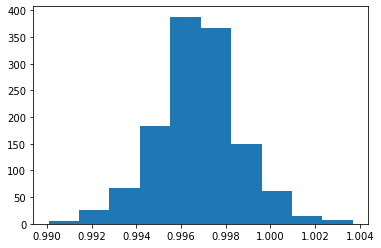

In [122]:
import matplotlib.pyplot as plt
plt.hist(d['density'])
plt.show()

# Labelling

**Labelling Wine quality as Good and Poor on basis of their rating.
Wine which rating is greater than 6.5, we will label them as good quality and lower than that will be of poor quality**

In [123]:
def qual(x):
    if x>6.5:
        return 'good'
    else:
        return 'poor'

In [124]:
d['rating']=d['quality'].apply(lambda x: qual(x))
X=d.drop(labels=['quality','rating'],axis=1)
y=d['rating']

In [125]:
y

0       poor
1       poor
2       poor
3       poor
5       poor
        ... 
1493    poor
1494    good
1495    poor
1497    poor
1498    poor
Name: rating, Length: 1271, dtype: object

In [126]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y_encode=encode.fit_transform(y)

# Removing outliers

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. 
Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers). Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile.

In [127]:
q1=d.quantile(0.25)
q2=d.quantile(0.75)
IQR=q2-q1
d=d[~((d<(q1-1.5*IQR))|(d>(q2+1.5*IQR))).any(axis=1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


In [128]:
#Standerising data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

# Model Building

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X,y_encode,random_state = 3,test_size = 0.25)

In [131]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('accuracy score for LOGISTIC REGRESSION : ',accuracy_score(y_test,lr_pred))

accuracy score for LOGISTIC REGRESSION :  0.8710691823899371


In [134]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('accuracy sore for RANDOM FOREST CLASSIFIER : ',accuracy_score(y_test,rf_pred))

accuracy sore for RANDOM FOREST CLASSIFIER :  0.8930817610062893


In [135]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
acc = accuracy_score(y_test,svc_pred)
print('accuracy sore for SUPPORT VECTOR CLASSIFIER :',acc)

accuracy sore for SUPPORT VECTOR CLASSIFIER : 0.89937106918239


In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred1 = dt.predict(x_test)
acc1 = accuracy_score(y_test,pred1)
print('accuracy sore for DECISION TREE CLASSIFIER :',acc1)

accuracy sore for DECISION TREE CLASSIFIER : 0.8333333333333334


# Support vector classifier is working very well on this dataset and we are achieving 89.93% accuracy.